# Install Java, Spark, and Findspark
This installs Apache Spark 2.2.1, Java 8, and [Findspark](https://github.com/minrk/findspark), a library that makes it easy for Python to find Spark.

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://apache.osuosl.org/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz
!wget -q https://www-eu.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
# !tar xf https://www-eu.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
# !pip install pyspark_dist_explore

# Set Environment Variables
Set the locations where Spark and Java are installed.

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.2.1-bin-hadoop2.7"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

# Start a SparkSession
This will start a local Spark session.

In [0]:
import findspark
import pandas
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import matplotlib.pyplot as plt

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
spark

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('NYC').getOrCreate()

In [0]:
!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv


--2018-12-10 15:13:30--  https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [application/octet-stream]
Saving to: ‘taxi+_zone_lookup.csv’

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0s      

2018-12-10 15:13:30 (125 MB/s) - ‘taxi+_zone_lookup.csv’ saved [12322/12322]



In [0]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-04.csv
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-05.csv

--2018-12-10 15:13:31--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-04.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71636786 (68M) [text/csv]
Saving to: ‘green_tripdata_2018-04.csv’

green_tripdata_2018 100%[===================>]  68.32M  28.8MB/s    in 2.4s    

2018-12-10 15:13:34 (28.8 MB/s) - ‘green_tripdata_2018-04.csv’ saved [71636786/71636786]

--2018-12-10 15:13:34--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-05.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71376136 (68M) [text/csv]
Saving to: ‘green_tripdata_2018-05.csv’

green_tripdata_2018 100%[===================>]  68.07M  35.2MB/s    in 1.9s    

2018-12-10 15:13:37 (35.2 

In [0]:
#!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv
data_tLookup = spark.read.csv("taxi+_zone_lookup.csv", header=True, inferSchema=True)

# data_tLookup = spark.read.csv('taxi _zone_lookup (1).csv', header = "true")
data_tLookupPU = data_tLookup.select(col("LocationID").alias("PULocationID"), 
                                       col("Borough").alias("PUBorough"), 
                                       col("Zone").alias("PUZone"), 
                                       col("service_zone").alias("PUservice_zone"))
#data_tLookupPU.show(5)
data_tLookupDO = data_tLookup.select(col("LocationID").alias("DOLocationID"), 
                                       col("Borough").alias("DOBorough"), 
                                       col("Zone").alias("DOZone"), 
                                       col("service_zone").alias("DOservice_zone"))
#data_tLookupDO.show(5)
data_ymarchjoined = data_ymarch.join(data_tLookupPU, "PULocationID", "outer")
data_ymarchjoined = data_ymarchjoined.join(data_tLookupDO, "DOLocationID", "outer")
data_ymarchjoined.show(3)


NameError: ignored

In [0]:
taxi_lookup.show(5)
taxi_lookup.groupBy('Borough').count().show()

NameError: ignored

In [0]:

print(spark.version)

2.4.0


In [0]:
green = spark.read.csv("green_tripdata_2018-04.csv", header=True, inferSchema=True)
green2 = spark.read.csv("green_tripdata_2018-05.csv", header=True, inferSchema=True)

In [0]:
green = green.union(green2)

In [0]:
type(green)

In [0]:
# Head
green.show(5)

In [0]:
# Check Schema
green.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- trip_type: integer (nullable = true)



In [0]:
# Dimensions
print((green.count(), len(green.columns)))

(800084, 19)


In [0]:
# Summary Statistics
green.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------+---------------------+------------------+------------------+-------------------+
|summary|          VendorID|store_and_fwd_flag|        RatecodeID|      PULocationID|      DOLocationID|   passenger_count|     trip_distance|       fare_amount|             extra|            mta_tax|        tip_amount|      tolls_amount|ehail_fee|improvement_surcharge|      total_amount|      payment_type|          trip_type|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+---------+---------------------+------------------+------------------+-------------------+
|  count|    

In [0]:
# Trips with 0 passengers
green.filter(green["passenger_count"]==0).show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+
|       1| 2018-04-01 00:21:45|  2018-04-01 00:37:20|                 N|         1|          97|          61|              0|          2.9|       13.0|  0.5|    0.5|       0.0|         0.0|     null|                  0.3|     

In [0]:
# Drop column with all NULL values
green = green.drop("ehail_fee")
type(green)
#green.na.drop().show()

# Filter out null values
green = green.filter(green.trip_type.isNotNull())
print((green.count(), len(green.columns)))

(800083, 18)


### Create new column Duration(in minutes)

In [0]:
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp('lpep_dropoff_datetime', format=timeFmt)
            - F.unix_timestamp('lpep_pickup_datetime', format=timeFmt))
green = green.withColumn("Duration", timeDiff/60)

### Cleaning up the newly created column DURATION
### Checking the inter quartile range of the duration column

In [0]:
cols = ['duration']
bounds = {}
for col in cols:
 quantiles = green.approxQuantile(
     col, [0.25, 0.75], 0.05
 )
 IQR = quantiles[1] - quantiles[0]
 bounds[col] = [
     quantiles[0] - 1.5 * IQR,
     quantiles[1] + 1.5 * IQR
 ]
bounds

{'duration': [-11.574999999999998, 35.69166666666666]}

### Eliminating the rows which are less than or equal to 0 and more than 35.69 minutes

In [0]:
green = green.filter((green["Duration"]  > 0) & (green["Duration"] < bounds['duration'][1]))

In [0]:
### Head ###
green.show(5)

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|          Duration|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+
|       2| 2018-04-01 00:55:44|  2018-04-01 01:01:33|                 N|         1|          80|         256|              1|         0.91|        6.0|  0.5|    0.5|       0.0|         0.0|          

In [0]:
type(green.na.drop().show())

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|          Duration|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+
|       2| 2018-04-01 00:55:44|  2018-04-01 01:01:33|                 N|         1|          80|         256|              1|         0.91|        6.0|  0.5|    0.5|       0.0|         0.0|          

NoneType

### Create new columns from the pickup  time column

In [0]:
from pyspark.sql.functions import date_format
date = green.select('lpep_pickup_datetime', date_format('lpep_pickup_datetime', 'H').alias('hour'), date_format('lpep_pickup_datetime', 'd').alias('date'), date_format('lpep_pickup_datetime', 'u').alias('day_number'), date_format('lpep_pickup_datetime', 'E').alias('day'))
#green.show()
date = date.withColumn('is_weekend',when((date.day == 'Sun') | (date.day == 'Sat'),1).otherwise(0))
# Convert string to numeric

from pyspark.sql.types import IntegerType
date = date.withColumn("hour", date["hour"].cast(IntegerType()))
date = date.withColumn("date", date["date"].cast(IntegerType()))
date = date.withColumn("day_number", date["day_number"].cast(IntegerType()))
date = date.withColumn("is_weekend", date["is_weekend"].cast(IntegerType()))

### Create the dataframe with all the new features.

In [0]:
from pyspark.sql.functions import monotonically_increasing_id
green1 =green.drop("lpep_pickup_datetime")
green1 = green1.withColumn("id", monotonically_increasing_id())
#df = df.drop("address")
date1 = date.withColumn("id", monotonically_increasing_id())

green1.show()

date1.show()

joined1 = date1.join(green1, "id", "outer").drop("id")

joined1.show()

+--------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+---+
|VendorID|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|          Duration| id|
+--------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+------------------+---+
|       2|  2018-04-01 01:01:33|                 N|         1|          80|         256|              1|         0.91|        6.0|  0.5|    0.5|       0.0|         0.0|                  0.3|         7.3|           2|        1| 5.816666666666666|  0|


In [0]:
#joined1 = joined1.withColumn("speed",(trip_distance*60)/(Duration))
#

In [0]:
joined1.printSchema()

root
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- hour: integer (nullable = true)
 |-- date: integer (nullable = true)
 |-- day_number: integer (nullable = true)
 |-- day: string (nullable = true)
 |-- is_weekend: integer (nullable = true)
 |-- VendorID: integer (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- trip_type: integer (

In [0]:
from pyspark.sql import functions as F
#timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
#speed = joined1('trip_distance')/joined1('Duration')
joined1 = joined1.withColumn("speed", joined1['trip_distance']*60/joined1['Duration'])

In [0]:
from pyspark.sql.functions import first, collect_list, mean

In [0]:
from pyspark.sql.functions import desc
from pyspark.sql.functions import first, collect_list, mean
joined1.groupby("day","day_number").agg(mean("speed")).sort("day_number").show()


+---+----------+------------------+
|day|day_number|        avg(speed)|
+---+----------+------------------+
|Mon|         1| 13.96913522279846|
|Tue|         2|13.901412944640546|
|Wed|         3|13.530943043674382|
|Thu|         4|13.061760001856083|
|Fri|         5|12.948408255236734|
|Sat|         6|14.080714343514876|
|Sun|         7|15.332125816241554|
+---+----------+------------------+



In [0]:
#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
      It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column (or else, change ylim)
        #if p_height > 0.95:
        #    label_position = height - (y_height * 0.05)
        #else:
        #    label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

In [0]:
# Create dataframe with frequencies with day
speed_plot = joined1.groupby("day","day_number").agg(mean("speed")).sort("day_number")
# Create dataframe with frequencies with date

# Convert the dataframe to pandas dataframe
speed_plot = speed_plot.toPandas()

# Drop the column day_number
speed_plot=speed_plot.drop('day_number',axis=1)
speed_plot = speed_plot.set_index('day')

In [0]:
speed_plot


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


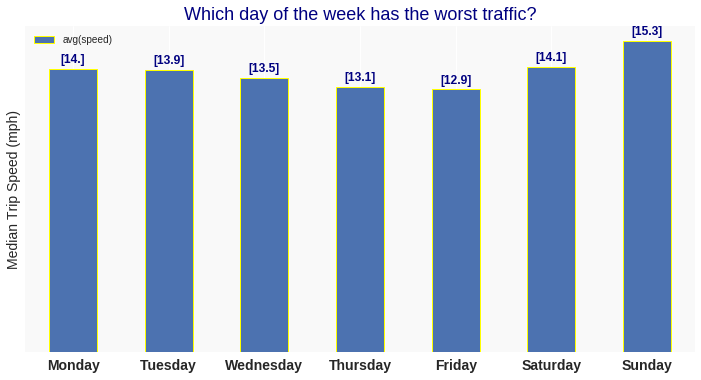

In [0]:
# Create dataframe with frequencies with day
speed_plot = joined1.groupby("day","day_number").agg(mean("speed")).sort("day_number")
# Create dataframe with frequencies with date

# Convert the dataframe to pandas dataframe
speed_plot = speed_plot.toPandas()

# Drop the column day_number
speed_plot=speed_plot.drop('day_number',axis=1)
speed_plot = speed_plot.set_index('day')

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

fig = plt.figure()
labels_list = speed_plot.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = speed_plot.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Trip Speed (mph)', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()

   day  day_number  avg(speed)
0  Mon           1   13.969135
1  Tue           2   13.901413
2  Wed           3   13.530943
3  Thu           4   13.061760
4  Fri           5   12.948408
5  Sat           6   14.080714
6  Sun           7   15.332126


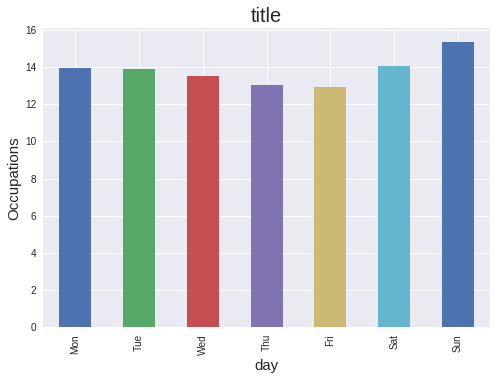

In [0]:
# Create dataframe with frequencies with day
speed_plot = joined1.groupby("day","day_number").agg(mean("speed")).sort("day_number")
# Create dataframe with frequencies with date

# Convert the dataframe to pandas dataframe
speed_plot = speed_plot.toPandas()
print(speed_plot.head(7))
# Drop the column day_number
speed_plot=speed_plot.drop('day_number',axis=1)

# Set the day column as index
speed_plot = speed_plot.set_index('day')

# Plot the box plot
speed_plot.T.squeeze().plot.bar()


#Labeling the graph properly
plt.title('title', fontsize=20)
plt.xlim(0, 700)
plt.xlabel('Count of jobs', fontsize=15)
plt.ylabel('Occupations', fontsize=15)
plt.grid()
#plt.barh(housing_df)
speed_plot.T.squeeze().plot.bar()
#housing_df.job.value_counts().plot.barh()
plt.show()



In [0]:
print((joined1.count(), len(joined1.columns)))

(743556, 25)


In [0]:
#df_viz[(df_viz.weekday >= 5)].groupby('hour')['trip_distance'].median()
trip_plot_w = joined1.filter(joined1["day_number"]>5).groupby("hour").agg(mean("trip_distance")).sort("hour")
# Create dataframe with frequencies with date
#trip_plot_w.show()

# Convert the dataframe to pandas dataframe
trip_plot_w = trip_plot_w.toPandas()
#print(trip_plot.head(7))

# Set the day column as index
trip_plot_w = trip_plot_w.set_index('hour')
#print(trip_plot_W.head(7))

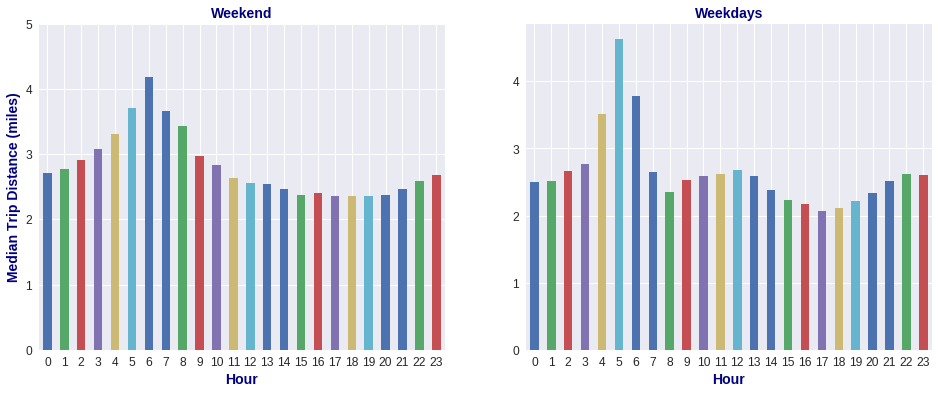

In [0]:
trip_plot_w = joined1.filter(joined1["day_number"]>5).groupby("hour").agg(mean("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
trip_plot_w = trip_plot_w.toPandas()
# Set the day column as index
trip_plot_w = trip_plot_w.set_index('hour').T.squeeze()

trip_plot_nw = joined1.filter(joined1["day_number"]<6).groupby("hour").agg(mean("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
trip_plot_nw = trip_plot_nw.toPandas()
# Set the day column as index
trip_plot_nw = trip_plot_nw.set_index('hour').T.squeeze()


plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
trip_plot_w.plot(kind='bar', rot = 0, fontsize=14)
plt.ylim(0, 5)
plt.tick_params(labelsize=12)
plt.ylabel('Median Trip Distance (miles)', fontsize=14, weight='bold', color='navy')
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend', fontsize=14, weight='bold', color='navy')

plt.subplot(1,2,2)
trip_plot_nw.plot(kind='bar', rot = 0)
plt.tick_params(labelsize=12)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekdays', fontsize=14, weight='bold', color='navy')

plt.show()

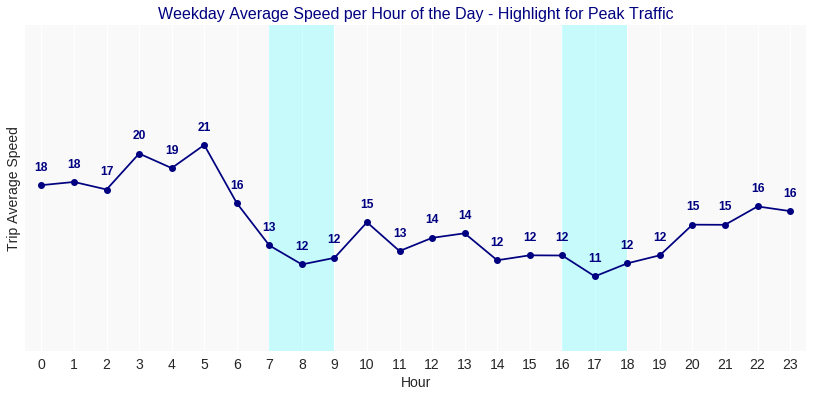

In [0]:
#df_plt7 = df_viz[df_viz.weekday < 5].groupby('hour')['trip_mph_avg']
avg_day_speed = joined1.filter(joined1["day_number"]<6).groupby("hour").agg(mean("speed")).sort("hour")

# Convert the dataframe to pandas dataframe
avg_day_speed = avg_day_speed.toPandas()
# Set the day column as index
avg_day_speed = avg_day_speed.set_index('hour').T.squeeze()


#Plot Peak Hour Median Trip Average Speed During Weekdays:

plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

#weekdays only: rush hour traffic 7-9 + 16-18
ax = avg_day_speed.plot(marker = 'o', color = 'navy')

for x, y in zip(avg_day_speed.index, avg_day_speed.values):
    ax.annotate('{:.0f}'.format(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [0]:
count_by_hour_1 = joined1.filter((joined1["day_number"] < 6) & (joined1["trip_distance"]>=5)).groupby("hour").agg(count("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
count_by_hour_1 = count_by_hour_1.toPandas().set_index('hour').T.squeeze()

count_by_hour_2 = joined1.filter((joined1["day_number"] < 6) & (joined1["trip_distance"]<5)).groupby("hour").agg(count("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
count_by_hour_2 = count_by_hour_2.toPandas().set_index('hour').T.squeeze()

count_by_hour_3 = joined1.filter((joined1["day_number"] > 5) & (joined1["trip_distance"]>=5)).groupby("hour").agg(count("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
count_by_hour_3 = count_by_hour_3.toPandas().set_index('hour').T.squeeze()

count_by_hour_4 = joined1.filter((joined1["day_number"] > 5) & (joined1["trip_distance"]<5)).groupby("hour").agg(count("trip_distance")).sort("hour")
# Convert the dataframe to pandas dataframe
count_by_hour_4 = count_by_hour_4.toPandas().set_index('hour').T.squeeze()

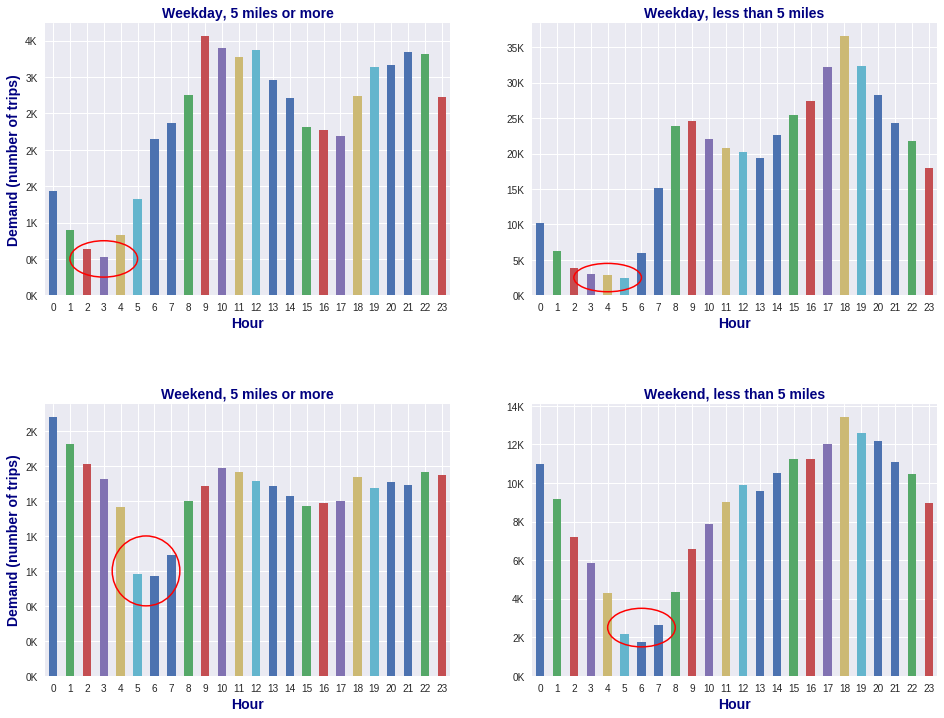

In [0]:
def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)
  
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.patches import Ellipse #Draw ellipse
fig = plt.figure(figsize = (16,12))
formatter = FuncFormatter(thousands_format)


plt.subplot(2,2,1)
ax1 = count_by_hour_1.plot(kind='bar', rot = 0)
ax1.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(3, 500), width=4, height=500, edgecolor='red', fc='None', lw=1.5)
ax1.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
#plt.ylim(0, 1400000)
plt.title('Weekday, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,2)
ax2 = count_by_hour_2.plot(kind='bar', rot = 0)
ax2.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(4, 2500), width=4, height=4000, edgecolor='red', fc='None', lw=1.5)
ax2.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekday, less than 5 miles', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,3)
ax3 = count_by_hour_3.plot(kind='bar', rot = 0)
#df_viz[(df_viz.weekday >= 5) & (df_viz.trip_distance >= 5)].\groupby('hour')['trip_distance'].count().plot(kind='bar', rot = 0)
ax3.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(5.5, 750), width=4, height=500, edgecolor='red', fc='None', lw=1.5)
ax3.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.ylabel('Demand (number of trips)', fontsize=14, weight='bold', color='navy')
#plt.ylim(0, 500000)
plt.title('Weekend, 5 miles or more', fontsize=14, weight='bold', color='navy')

plt.subplot(2,2,4)
ax4 = count_by_hour_4.plot(kind='bar', rot = 0)
ax4.yaxis.set_major_formatter(formatter)
ellipse = Ellipse(xy=(6, 2500), width=4, height=2000, edgecolor='red', fc='None', lw=1.5)
ax4.add_patch(ellipse)
plt.xlabel('Hour', fontsize=14, weight='bold', color='navy')
plt.title('Weekend, less than 5 miles', fontsize=14, weight='bold', color='navy')


fig.subplots_adjust(hspace=0.4)
plt.show()
#plot_url = py.plot_mpl(fig)

In [0]:
count_by_hour_4

hour
0     1428
1      896
2      632
3      527
4      823
5     1329
6     2143
7     2375
8     2750
9     3559
10    3405
11    3272
12    3378
13    2959
14    2716
15    2307
16    2267
17    2185
18    2743
19    3144
20    3168
21    3351
22    3314
23    2731
Name: count(trip_distance), dtype: int64

### Frequency of Categorical variables

In [0]:
joined1.groupBy('store_and_fwd_flag').count().show()
joined1.groupBy('passenger_count').count().show()
joined1.groupBy('trip_type').count().show()
joined1.groupBy('RatecodeID').count().show()
joined1.groupBy('payment_type').count().show()
joined1.groupBy('VendorID').count().show()

+------------------+------+
|store_and_fwd_flag| count|
+------------------+------+
|                 Y|   999|
|                 N|742557|
+------------------+------+

+---------------+------+
|passenger_count| count|
+---------------+------+
|              1|625897|
|              6| 14514|
|              3| 12851|
|              5| 25143|
|              9|     3|
|              4|  4200|
|              8|    10|
|              7|    13|
|              2| 59925|
|              0|  1000|
+---------------+------+

+---------+------+
|trip_type| count|
+---------+------+
|        1|732029|
|        2| 11527|
+---------+------+

+----------+------+
|RatecodeID| count|
+----------+------+
|         1|731579|
|         6|    10|
|         3|   190|
|         5| 10676|
|         4|   323|
|         2|   778|
+----------+------+

+------------+------+
|payment_type| count|
+------------+------+
|           1|407245|
|           3|  3580|
|           5|    28|
|           4|  2014|
|         

### Plot for the rides per day in 31 days

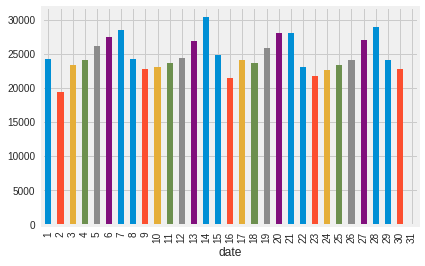

In [0]:
import pandas

# Create dataframe with frequencies with date
date_plot = joined1.groupBy('date').count()
# Convert the dataframe to pandas dataframe
date_plot = date_plot.toPandas()
# Set the date column as index
date_plot =date_plot.set_index('date')
# Sort the dataframe according to inndex
date_plot.sort_index(inplace=True)
# Plot the box plot
date_plot.T.squeeze().plot.bar()

### Plot for number of days for each day of a week

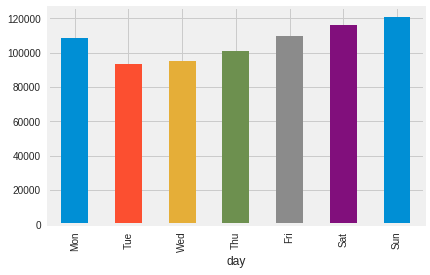

In [0]:
# Create dataframe with frequencies with day
day_plot = joined1.groupBy('day','day_number').count()
# Convert the dataframe to pandas dataframe
day_plot = day_plot.toPandas()

# Sort the dataframe based on the day
day_plot.sort_values("day_number", inplace=True)

# Drop the column day_number
day_plot=day_plot.drop('day_number',axis=1)

# Set the day column as index
day_plot =day_plot.set_index('day')

#day_plot.sort_index(inplace=True)
# Plot the box plot
day_plot.T.squeeze().plot.bar()

### Number of bookings based on the hour of the day

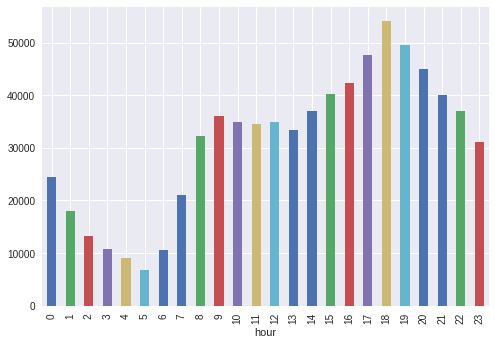

In [0]:
# Create dataframe with frequencies with date
hour_plot = joined1.groupBy('hour').count()
# Convert the dataframe to pandas dataframe
hour_plot = hour_plot.toPandas()
# Set the hour column as index
hour_plot =hour_plot.set_index('hour')
# Sort the dataframe according to inndex
hour_plot.sort_index(inplace=True)
# Plot the box plot
hour_plot.T.squeeze().plot.bar()

### Number of bookings based on the hour of the day on weekends

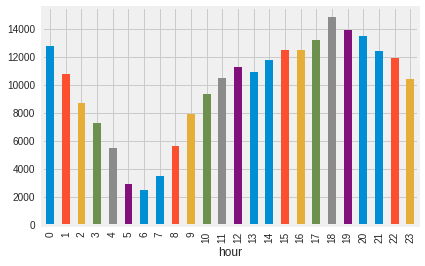

In [0]:
## df.filter(df["age"]>24)

# Create dataframe with frequencies with date
hour_plot = joined1.filter(joined1["is_weekend"]== 1)
hour_plot = hour_plot.groupBy('hour').count()

# Convert the dataframe to pandas dataframe
hour_plot = hour_plot.toPandas()
# Set the hour column as index
hour_plot =hour_plot.set_index('hour')
# Sort the dataframe according to inndex
hour_plot.sort_index(inplace=True)
# Plot the box plot
hour_plot.T.squeeze().plot.bar()

### Number of bookings based on the hour of the day on weekdays

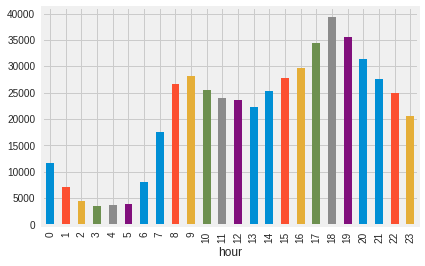

In [0]:
## df.filter(df["age"]>24)

# Create dataframe with frequencies with date
hour_plot = joined1.filter(joined1["is_weekend"]== 0)
hour_plot = hour_plot.groupBy('hour').count()

# Convert the dataframe to pandas dataframe
hour_plot = hour_plot.toPandas()
# Set the hour column as index
hour_plot =hour_plot.set_index('hour')
# Sort the dataframe according to inndex
hour_plot.sort_index(inplace=True)
# Plot the box plot
hour_plot.T.squeeze().plot.bar()

In [0]:
#data.groupby('id').agg({'category':'count','count':'sum'}).withColumnRenamed('count(category)',"num_category").show()
joined1.groupby('id').agg({'category':'count','count':'sum'}).withColumnRenamed('count(category)',"num_category").show()

AnalysisException: ignored

In [0]:
#df_pd = green.toPandas()
df_pd_passenger_count=df_pd.passenger_count.value_counts()
df_pd_passenger_count.sort_index(inplace=True)
df_pd_passenger_count= df_pd_passenger_count.plot.bar()
#plt.show()
#df_pd_passenger_count.head()

In [0]:
df_pd_passenger_count.plot.bar()